In [2]:
import csv
import re
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

In [3]:

label_dict = {
    'reference map' : 0,
    'geology sketch' : 1,
    'photomicrograph' : 2,
    'profile' : 3,
    'plant and project sketch' : 4,
    'geological map' : 5,
    'table' : 6,
    'outcrop photograph' : 7,
    'hand sample photograph' : 8,
    'bar chart' : 9,
    'oil ship photograph' : 10,
    'fluxogram' : 11,
    'equipment sketch' : 12,
    'geological chart' : 13,
    'person portrait photograph' : 14,
    'submarine arrangement' : 15,
    'van krevelen diagram' : 16,
    'stratigraphic isoattribute map' : 17,
    'completion scheme' : 18,
    'seismic section' : 19,
    '3d block diagram' : 20,
    'geological cross section' : 21,
    'scatter plot' : 22,
    'equipment photograph' : 23,
    'well core photograph' : 24,
    'temperature map' : 25,
    'sattelite image' : 26,
    'variogram' : 27,
    'box plot' : 28,
    'oil rig photograph' : 29,
    'scanning electron microscope image' : 30,
    'chromatogram' : 31,
    'line graph' : 32,
    'stereogram' : 33,
    'geophysical map' : 34,
    'ternary diagram' : 35,
    '3d visualization' : 36,
    'radar chart' : 37,
    'structure contour map' : 38,
    'seismic cube' : 39,
    'diffractogram' : 40,
    'aerial photograph' : 41,
    'rose diagram' : 42,
    'microfossil photograph' : 43,
    'geotectonic map' : 44
}

In [7]:
Image.MAX_IMAGE_PIXELS = None
from PIL import PngImagePlugin
LARGE_ENOUGH_NUMBER = 100000
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)

index_path = '/home/julia/Documents/ds/labels/v14-one-tree.csv'
img_dir = '/home/julia/Documents/ds/images/by-hash'
out_file = 'geo_ds_stats.csv'

header = ['index',
          'mode', 
          'height',
          'width',
          'class',
          'path']

with open(out_file, 'w', newline='') as out:
    writer = csv.DictWriter(out, fieldnames=header)
    writer.writeheader()

with open(index_path, newline='') as index_file:
    index = csv.reader(index_file)
    next(index)
    file_index = 0
    for path, label in index:
        path = re.search('.*/images/by\-hash(.*)', path).group(1)
        info = {}
        with Image.open(img_dir + path) as img_pil:
            info['index'] = file_index
            info['mode'] = img_pil.mode
            info['height'] = img_pil.height
            info['width'] = img_pil.width
            info['class'] = label
            info['path'] = path
            file_index += 1
        with open(out_file, 'a', newline='') as out:
            writer = csv.DictWriter(out, fieldnames=header)
            writer.writerow(info)

In [4]:
info_filename = 'geo_ds_stats.csv'
num_img = 25725

modes = {}
w = np.ndarray((num_img, 1), dtype=np.int32)
h = np.ndarray((num_img, 1), dtype=np.int32)
l = np.ndarray((num_img, 1), dtype=np.int32)
with open(info_filename, newline='') as info_file:
    info = csv.reader(info_file)
    next(info)
    for index, mode, heigth, width, label, path in info:
        if mode not in modes:
            modes[mode] = 1
        else:
            modes[mode] += 1
        index = int(index)
        width = float(width)
        heigth = float(heigth)
        w[index] = width
        h[index] = heigth
        l[index] = label_dict[label]


In [5]:
area = w * h
area_classes = [area[l == label_dict[label]] for label in label_dict]

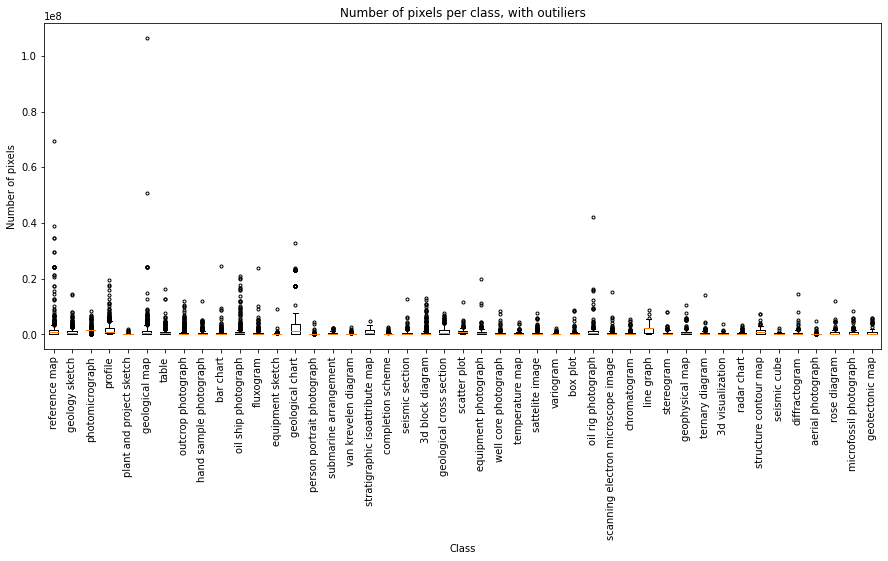

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
bp = ax.boxplot(area_classes, sym='.', labels=label_dict.keys())
ax.set(
    title='Number of pixels per class, with outiliers',
    xlabel='Class',
    ylabel='Number of pixels',
)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

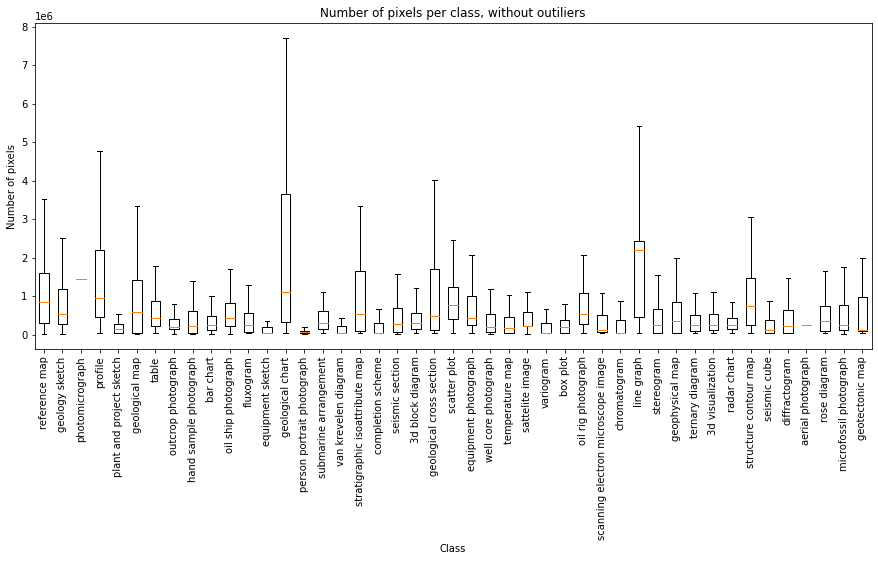

In [32]:

fig, ax = plt.subplots(figsize=(15, 6))
bp = ax.boxplot(area_classes, sym='', labels=label_dict.keys())
ax.set(
    title='Number of pixels per class, without outiliers',
    xlabel='Class',
    ylabel='Number of pixels',
)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

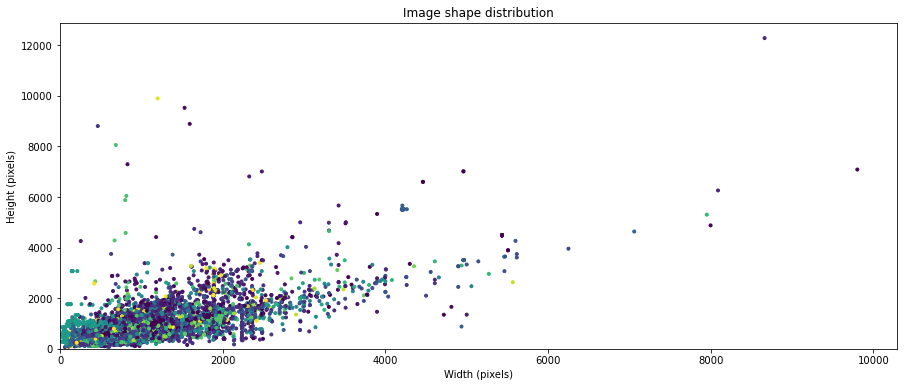

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(w,h, c=l, vmin=0, vmax=44, marker='.')
ax.set(
    title='Image shape distribution',
    xlabel='Width (pixels)',
    ylabel='Height (pixels)',
)
ax.set_ylim(0.0)
ax.set_xlim(0.0)
plt.show()

In [10]:
mode_dict = dict.fromkeys(modes.keys())
for idx, mode in enumerate(mode_dict.keys()):
    mode_dict[mode] = idx

m = np.ndarray((num_img, 1), dtype=np.int32)
with open(info_filename, newline='') as info_file:
    info = csv.reader(info_file)
    next(info)
    for index, mode, heigth, width, label, path in info:
        m[int(index)] = mode_dict[mode]


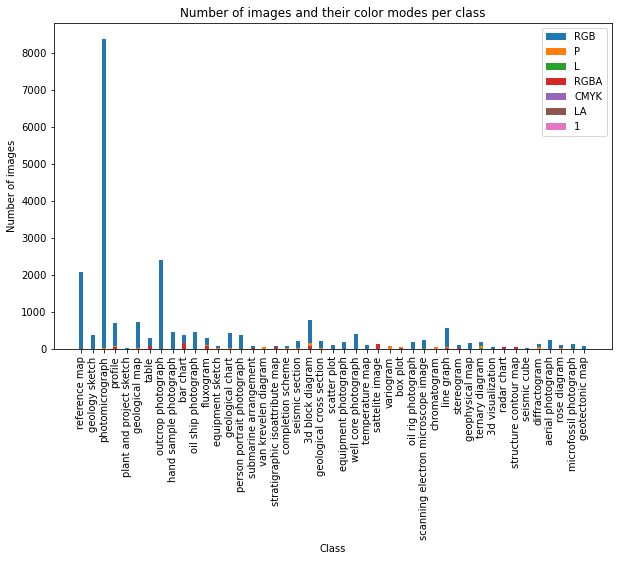

In [21]:

mode_classes = np.ndarray((len(label_dict), len(mode_dict)), dtype=np.int32)
for label in label_dict:
    for mode in mode_dict:
        mode_classes[label_dict[label], mode_dict[mode]] = np.count_nonzero(m[l==label_dict[label]] == mode_dict[mode])

fig, ax = plt.subplots(figsize=(10, 6))

for mode in mode_dict:
    if mode_dict[mode] == 0:
        ax.bar(label_dict.keys(), mode_classes[:,mode_dict[mode]], 0.35, label=mode)
    else:
        ax.bar(label_dict.keys(), mode_classes[:,mode_dict[mode]], 0.35, label=mode, bottom=mode_dict[mode]-1)
ax.legend()
ax.set(
    title='Number of images and their color modes per class',
    xlabel='Class',
    ylabel='Number of images',
)
ax.tick_params(axis='x', labelrotation = 90)
plt.show()


In [15]:
imgs = []
target = 'photomicrograph'

with open(info_filename, newline='') as info_file:
    info = csv.reader(info_file)
    next(info)
    for index, mode, heigth, width, label, path in info:
        if label == target:
            imgs.append(path)
print('Images found: ', len(imgs))
show_num = 5
print(imgs[:show_num])

Images found:  8450
['/001/sha1-00117c92f0f2d38bc3b4a56e9f8762a99239ac3c.jpg', '/001/sha1-00181ad874f290ce28bf81098d0e8f85d0c3aa70.jpg', '/001/sha1-001ab79f79166fba5b87a25e4c8d20a01b114cf4.jpg', '/003/sha1-0034adec6f3a3f2f3037fb5644d122c7fbbd1a1c.jpg', '/003/sha1-003523a2efeb3090785e242045d5727d5448a071.jpg']
